In [1]:
import numpy as np
import pandas as pd
import time
import datetime
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm_notebook as tqdm

import plot_set
import model_opt
import algo_GD
import algo_minibatch
import helper
import noise

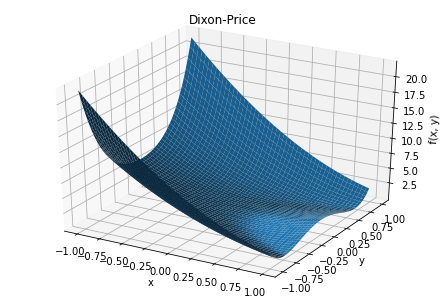

In [2]:
f = model_opt.DixonPrice()
plot_set.function_value_3d(f,1)

In [11]:
a = 0.001
t = 1000
w = np.array([1,1])
#重要なパラメーターになりそう
eta = 0.005

var = 10 # iqr 70~80


model_func = model_opt.DixonPrice
polyak_w = []
for i in tqdm(range(10)):
    noise_data = noise.Gauss(mean=0, sigma=var, dim=2, n=t).generate()
    algo = algo_minibatch.PolyakRupportAveraging(a, t, w, eta, noise_data)
    polyak_w.append(algo.calculate(model_func))
    


In [5]:
df = pd.read_csv("minibatch_f_value/2020-08-23 17:59:43.618113.csv")
sgd_f_value = df.values[:1000,3]

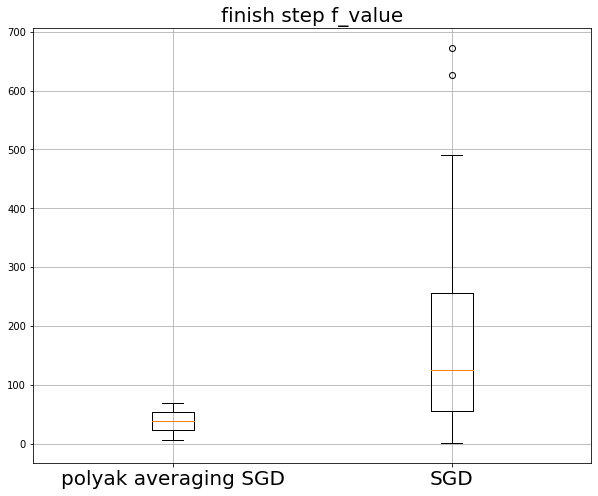

In [12]:
f_value = f.f_opt(polyak_w)
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)
noise_box = f_value,sgd_f_value
bp1 = ax1.boxplot(noise_box)
ax1.set_xticklabels(["polyak averaging SGD","SGD"],fontsize=20)
ax1.set_title('finish step f_value',fontsize=20)
ax1.grid()

plt.show()

In [13]:
polyak_w

[array([0.93673263, 0.69305158]),
 array([1.0914177 , 0.76001564]),
 array([0.95628497, 0.69861315]),
 array([0.98730363, 0.71759138]),
 array([1.0219632, 0.7308604]),
 array([1.0816203, 0.758861 ]),
 array([1.00945241, 0.71935694]),
 array([1.05844626, 0.75106116]),
 array([1.06933559, 0.74947813]),
 array([1.03401018, 0.73710525])]